---

<h1><center>SDSE Lab 2 <br><br> Gradient descent and <br> Stochastic Gradient Descent </center></h1>

---

Note: The format for the report is as a Jupyter Notebook. Please include the section number and SIDs of the members of your group in the results dictionary. A single notebook should be submitted as a group submission in Gradescope. 

In [5]:
result = {
    'section_number' : 1, # enter your student id here
    'SIDs': [3036429331, 3031851018, 3037390290] # enter the SIDs for the group members
} 

# Introduction

In this lab we will explore the gradient descent and stochastic gradient descent algorithms for solving a least squares optimization problem. The setup is as follows. We wish to model a process with scalar input $X$ and scalar output $Y$. Both of these are real-valued random variables; their sample spaces are the real line. The joint distribution of $X$ and $Y$ is given as:
\begin{align*}
X &\sim \mathcal{U}(0,1) \\
Y|X\!=\!x &\sim \mathcal{N}( \theta_0 + \theta_1 x ,\sigma^2_\epsilon)
\end{align*}
This definition of $Y|X\!=\!x$ is equivalent to,
\begin{equation*}
Y = \theta_0 + \theta_1 X + \epsilon
\end{equation*}
with $\epsilon\sim\mathcal{N}(0,\sigma^2_\epsilon)$.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.stats as stats

# 1. Sampling the joint distribution

We will first construct a synthetic dataset by sampling  from $(X,Y)$. 

## (1a)

Write a function called `sampleXY` that produces a dataset $\{(x_n,y_n)\}_N$ of iid samples from $(X,Y)$, given arguments $N$, $\theta_0$, $\theta_1$, and $\sigma^2_\epsilon$. The output of this function should be a numpy array with shape = $(N,2)$. 

In [7]:
def sampleXY(N, theta0, theta1, sigma2_eps):
    x = np.random.uniform(low=0, high=1, size=N)
    epsilon = np.random.normal(0, sigma2_eps, size=N)
    y = theta0 + theta1 * x + epsilon
    result = np.empty((N, 2))
    result[:,0] = x
    result[:,1] = y
    return result

In [8]:
N = 40
theta0=0.2
theta1=-0.4
sigma2_eps=0.0049
XYsamp = sampleXY(N, theta0, theta1, sigma2_eps)

Run `sampleXY` with $N\!=\!40$, $\theta_0\!=\!0.2$, $\theta_1\!=\!-0.4$, and $\sigma^2_\epsilon\!=\!0.0049$ and assign the result to the variable `XYsamp`. Create a plot showing the line $y=\theta_0 + \theta_1 x$, overlaid with a scatter plot of `XYsamp`. The plot should have labels on the x and y axes. (4 pts)

Text(0, 0.5, 'Y')

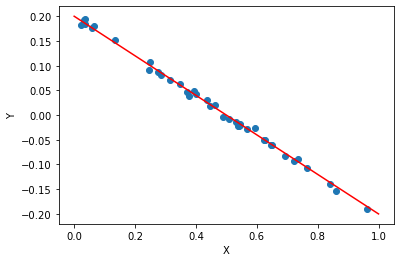

In [9]:
fig1 = plt.figure()
plt.scatter(XYsamp[:,0], XYsamp[:,1])
plt.plot([0,1],[0.2,-0.2], 'r')
plt.xlabel('X')
plt.ylabel('Y')

In [10]:
################################
# Reporting. Do not modify.#####
result['fig1'] = fig1
################################

We will now overwrite the data you sampled with another dataset contained in the file `1d_data.pickle`. This is so the results are predictable.

In [11]:
# with open('./1d_data.pickle', 'rb') as file:
    # XYsamp = pickle.load(file)

import pandas as pd
XYsamp = pd.read_pickle('https://github.com/ggomes/sdse_public/raw/main/lab2/1d_data.pickle')

# 2. Least squares linear regression

WE ARE SKIPPING THIS PART

# 3. Gradient descent

We will now write an iterative numerical algorithm for solving the least squares problem. We take the objective function of the problem to be:
\begin{equation*}
J(\hat\theta_0,\hat\theta_1) = \frac{1}{N} \sum_{n=1}^{N} \left( \hat\theta_0 + \hat \theta_1 \:x_n - y_n \right)^2
\end{equation*}

## (3a)

Write a function called `nablaJ` that takes `XYsamp`, $\hat\theta_0$, and $\hat\theta_1$ as inputs, and returns the gradient as a numpy array of length 2.

In [13]:
def nablaJ(XYsamp, theta0, theta1):
    N = XYsamp.shape[0]
    x = XYsamp[:,0]
    y = XYsamp[:,1]
    J = np.empty((2))
    J[0] = 2*theta0*N + 2*theta1*np.sum(x) - 2*np.sum(y)
    J[1] = 2*np.sum((theta0 + theta1*x - y)*x)
    return J

In [14]:
################################
# Reporting. Do not modify.#####
result['nablaJ_3a_a'] = nablaJ(XYsamp,0.5,-1)
result['nablaJ_3a_b'] = nablaJ(XYsamp,1.1,0.6)
################################

## (3b)

Write a function called `gradient_descent` that executes the gradient descent algorithm. This function should take as input 

+ The dataset `XYsamp`
+ the total number of steps to take $K$
+ the step size $\gamma$
+ the initial condition Theta0 as a numpy array of length 2. 

It should return the trajectory as a with shape = `(K,2)`. (8 pts)

In [15]:
def gradient_descent(XYsamp,K,gamma,Theta0):
    traj = np.empty((K, 2))
    N = XYsamp.shape[0]
    gamma = gamma/N
    for k in range(K):
        Theta0 = Theta0 - gamma*nablaJ(XYsamp, Theta0[0], Theta0[1])
        traj[k] = Theta0
    return traj

In [16]:
################################
# Reporting. Do not modify.#####
result['gd_3b_a'] = gradient_descent(XYsamp,10,0.1,np.array([-0.5,0.5]))
result['gd_3b_b'] = gradient_descent(XYsamp,20,0.01,np.array([0.5,-0.5]))
################################

## (3c)

Complete the `run_gd_on_grid(theta0_grid,theta1_grid,K,gamma)`. This function takes as input
+ `theta0_grid` and `theta1_grid`. These are a 5x5 grid of values of $\hat\theta_0$ and $\hat\theta_1$. 
+ `K`: the number of steps to take, and
+ `gamma`: the step size. 

The function should return a numpy array with shape (5,5,K,2), where the (i,j,:,:) is a (K,2) trajectory of parameter values. 

Run the function with $K=200$, $\gamma=0.2$ and save the result to `trajectories`.

Note: The code for creating the 5x5 grid is provided. 

(8 pts)

In [17]:
# Do not alter this code. It creates the 5x5 grid of values 
# that are passed to `run_gd_on_grid`
def make_grid(gridN):
    theta_0_array = np.linspace(-1,1,gridN)
    theta_1_array = np.linspace(-1,1,gridN)
    return  np.meshgrid(theta_0_array,theta_1_array)

gridN = 5
theta0_grid,theta1_grid = make_grid(gridN)

In [18]:
def run_gd_on_grid(theta0_grid,theta1_grid,K,gamma):
    trajectories = np.empty((5,5,K,2))
    for i in range(gridN):
        for j in range(gridN):
            theta0 = np.array((theta0_grid[i, j], theta1_grid[i, j]))
            traj = gradient_descent(XYsamp, K, gamma, theta0)
            trajectories[i, j, :, :] = traj
    return trajectories

In [19]:
################################
# Reporting. Do not modify.#####
result['grid_3c'] = run_gd_on_grid(theta0_grid,theta1_grid,K=200,gamma=0.2)
################################

## (3d)

Complete the function below that plots the error vectors for each of the 25 trajectories in a single plot. The error for each trajectory is an array of length 200, with the $k$'th element computed as:
\begin{equation*}
e_k := \sqrt{ (\hat\theta_{0,k}-\theta_0)^2 + (\hat\theta_{1,k}-\theta_1)^2 } 
\end{equation*}
Here $k\in[1,...,K]$ is the gradient descent iteration step. Plot all 25 of them on a single plot with the iteration index on the x axis and the logarithm of the error on the y axis. (8 pts) 

In [20]:
def plot_error(trajectories):
    K = trajectories.shape[2]
    errors = np.empty((5,5,K))
    for i in range(gridN):
        for j in range(gridN):
            for k in range(K):
                theta0k, theta1k = trajectories[i, j, k]
                e_k = np.sqrt((theta0k - theta0)**2 + (theta1k - theta1)**2)
                errors[i,j,k] = e_k
    return errors

In [21]:
################################
# Reporting. Do not modify.#####
result['fig_3d'] = plot_error(result['grid_3c'])
################################

## (3e)

The `plot_quiver` function shown below creates an image of the $\nabla_\theta J$ as a vector field and returns the figure handle. 

Your task is to complete `plot_traj`. This function takes the existing figure handle as input (provided by `plot_quiver`) and should overlay it with the 25 trajectories obtained with gradient descent. Each trajectory should be plotted with a thin red line. `plot_traj` should then return the same figure handle. (6 pts)

In [25]:
def plot_quiver():
    
    gridN = 10
    theta0_grid, theta1_grid = make_grid(gridN)
    flatgrid = np.reshape([theta0_grid, theta1_grid],(2,gridN**2)).T
    UV = np.empty(flatgrid.shape)
    for i, (theta0z, theta1z) in enumerate(flatgrid):
        UV[i,:] = nablaJ(XYsamp,theta0z, theta1z)
    
    fig = plt.figure(figsize=(8,8))
    plt.quiver(flatgrid[:,0], flatgrid[:,1],-UV[:,0],-UV[:,1],scale=300)
    
    plt.xlabel('theta0',fontsize=15)
    plt.ylabel('theta1',fontsize=15)
    plt.plot(theta0,theta1,'o',markersize=16)
    plt.axis([-1,1,-1,1])
    return fig

In [26]:
def plot_traj(fig,trajectories):  
    plt.figure(fig)
    for i in range(trajectories.shape[0]):
        for j in range(trajectories.shape[1]):
            x = trajectories[i, j, :, 0]
            y = trajectories[i, j, :, 1]
            plt.plot(x, y, 'r')
    return fig

In [27]:
# plot_traj(plot_quiver(),trajectories)  

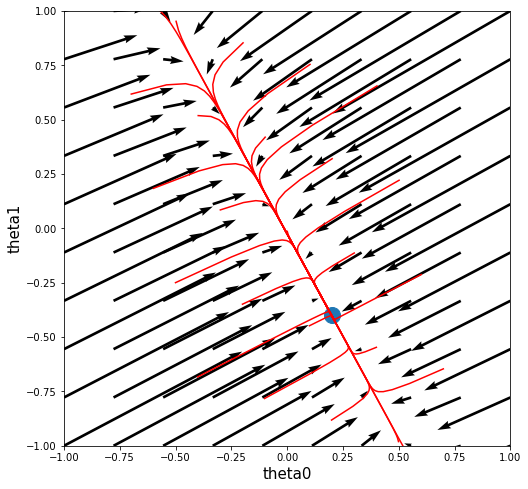

In [28]:
################################
# Reporting. Do not modify.#####
result['fig_3e'] = plot_traj(plot_quiver(),result['grid_3c'])
################################

## (3f)

Repeat parts (d) and (e) with $\gamma=0.01$ and $\gamma=0.7$. (0 pts)
Note: This part is not awarded points. It is simply for you to appreciate the effect of the step size.

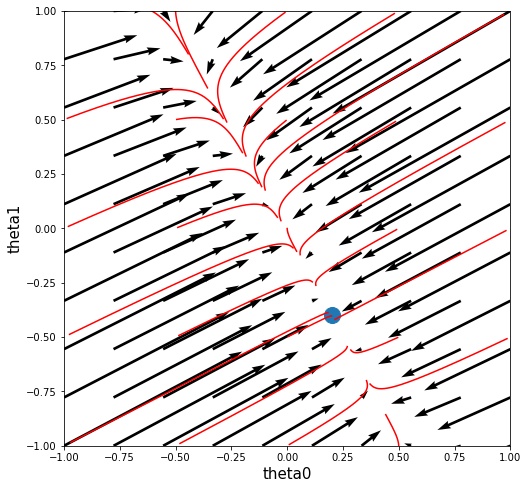

In [29]:
################################
# Reporting. Do not modify.#####
trajectories2 = run_gd_on_grid(theta0_grid,theta1_grid ,K=200,gamma=0.01)
result['fig_3fA_phase'] = plot_traj(plot_quiver(),trajectories2)
result['fig_3fA_error'] = plot_error(trajectories2)
################################

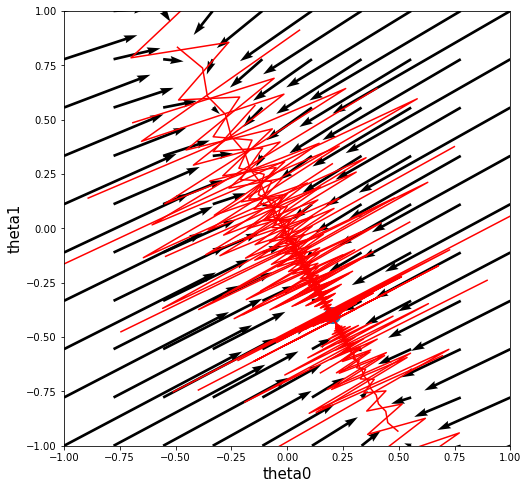

In [30]:
################################
# Reporting. Do not modify.#####
trajectories3 = run_gd_on_grid(theta0_grid,theta1_grid ,K=200,gamma=0.7)
result['fig_3fB_phase'] = plot_traj(plot_quiver(),trajectories3)
result['fig_3fB_error'] = plot_error(trajectories3)
################################

# 4. Additive cost

The deliverable for this part is a single plot is in the $\theta_0, \theta_1$ plane. The limits should be from -1 to 1 along both axes, as in previous parts. The plot should have these elements. (10 pts)

+ For each sample $n$, draw a thin black line in the parameter space corresponding to $\ell_n=0$. There should be a total of $N=40$ lines. 
+ Place a small dot at the intersection of every line. There will be a total of $N(N-1)/2$ such dots. Briefly explain the interpretation of these intersections. 
+ Plot a large dot at the location of the true parameter values. 
+ Overylay one of the gradient descent trajectories from part 3.

Save the handle of the figure in the variable `fig4`. This will be added to the results dictionary.

In [ ]:
fig4 = plt.figure()

In [ ]:
################################
# Reporting. Do not modify.#####
result['fig4'] = fig4
################################

# 5. Stochastic Gradient Descent

## 5(a)

(10 pts) Code stochastic gradient descent. Complete the function `SGD` below. This function takes as arguments 
+ the dataset `XYsamp`, 
+ the step size $\gamma$ and 
+ the number of epochs to run. 

`SGD` function should

+ randomly choose the initial condition with uniform probability from $[-1,1]\times[-1,1]$
+ use batches of size 1,
+ draw samples without replacement.

The function should return the parameter trajectory. 


Run SGD with $\gamma=0.1$ and 10 epochs. Recreate the plot from part 4 but using this SGD trajectory instead of GD. Save the figure handle as `fig5a`.

In [ ]:
def SGD(XYsamp,gamma,epochs):
    pass

In [ ]:
fig5a = plt.figure()

In [ ]:
################################
# Reporting. Do not modify.#####
result['fig5a'] = fig5a
################################

## 5(b)

Make the same plot with $\gamma=0.01$ and $\gamma=0.4$. Save the figure handles respectively as `fig5b1` and `fig5b2`. (6 pts) 

In [ ]:
fig5b1 = plt.figure()
fig5b2 = plt.figure()

In [ ]:
################################
# Reporting. Do not modify.#####
result['fig5b1'] = fig5b1
result['fig5b2'] = fig5b2
################################

## 5(c)

Comment on the pros and cons of SGD with respect to GD. Save your comments in a string called `comment`. (6 pts) 

In [ ]:
comment = ''

In [ ]:
################################
# Reporting. Do not modify.#####
result['comment'] = comment
################################

---
## Do not modify below this

In [ ]:
with open('{}.pickle'.format("_".join([str(sid) for sid in result['SIDs']])),'wb') as file:
    pickle.dump(result,file)